In [1]:
import pandas as pd
import numpy as np

In [2]:
xy = pd.read_parquet('XY_version1.parquet')
xy.head()

,year,area,avg_yield_maize_corn_1y,avg_yield_maize_corn_3y,avg_yield_maize_corn_6y,avg_yield_other_vegetables_fresh_nec_1y,avg_yield_other_vegetables_fresh_nec_3y,avg_yield_other_vegetables_fresh_nec_6y,avg_yield_potatoes_1y,avg_yield_potatoes_3y,...,Y_oil_palm_fruit,Y_other_vegetables_fresh_nec,Y_potatoes,Y_rice,Y_soya_beans,Y_sugar_beet,Y_sugar_cane,Y_tomatoes,Y_watermelons,Y_wheat
0,1983,Afghanistan,1665.8,1668.633333,1636.283333,6919.2,6846.166667,6561.216667,15511.4,15265.133333,...,NaN,7065.7,15764.7,2258.1,NaN,20000.0,19375.0,NaN,9754.9,1258.0
1,1984,Afghanistan,1664.1,1666.300000,1649.750000,7065.7,6959.033333,6775.366667,15764.7,15566.600000,...,NaN,7155.1,14444.4,2241.6,NaN,20000.0,19354.8,NaN,9630.0,1231.9
2,1985,Afghanistan,1661.2,1663.700000,1656.900000,7155.1,7046.666667,6897.800000,14444.4,15240.166667,...,NaN,7145.9,14090.9,2248.2,NaN,3333.3,19333.3,NaN,9556.7,1227.7
3,1986,Afghanistan,1665.2,1663.500000,1666.066667,7145.9,7122.233333,6984.200000,14090.9,14766.666667,...,NaN,7249.5,15866.7,2240.0,NaN,12500.0,20000.0,NaN,10058.8,1189.0
4,1987,Afghanistan,1687.5,1671.300000,1668.800000,7249.5,7183.500000,7071.266667,15866.7,14800.666667,...,NaN,7524.8,15500.0,2000.0,NaN,15000.0,20000.0,NaN,9952.9,1284.9


In [3]:
latlong  = pd.read_csv('coordinates_countries_full_209.csv')
latlong['area'] = latlong['Area'].str.replace(' ', '_')
latlong = latlong[['area', 'latitude', 'longitude']]

In [4]:
xy = xy.merge(latlong, on='area')
xy = pd.get_dummies(xy, columns=['area'])
xy.columns = (
    xy.columns
    .str.strip()             # remove leading/trailing spaces
    .str.replace(' ', '_')   # replace spaces
    .str.replace(r'[^A-Za-z0-9_]', '', regex=True)  # remove special chars
)
xy.head()


,year,avg_yield_maize_corn_1y,avg_yield_maize_corn_3y,avg_yield_maize_corn_6y,avg_yield_other_vegetables_fresh_nec_1y,avg_yield_other_vegetables_fresh_nec_3y,avg_yield_other_vegetables_fresh_nec_6y,avg_yield_potatoes_1y,avg_yield_potatoes_3y,avg_yield_potatoes_6y,...,area_United_States_of_America,area_Uruguay,area_Uzbekistan,area_Vanuatu,area_Venezuela_Bolivarian_Republic_of,area_Viet_Nam,area_Yemen,area_Yugoslav_SFR,area_Zambia,area_Zimbabwe
0,1983,1665.8,1668.633333,1636.283333,6919.2,6846.166667,6561.216667,15511.4,15265.133333,14069.250000,...,False,False,False,False,False,False,False,False,False,False
1,1984,1664.1,1666.300000,1649.750000,7065.7,6959.033333,6775.366667,15764.7,15566.600000,14942.316667,...,False,False,False,False,False,False,False,False,False,False
2,1985,1661.2,1663.700000,1656.900000,7155.1,7046.666667,6897.800000,14444.4,15240.166667,15060.333333,...,False,False,False,False,False,False,False,False,False,False
3,1986,1665.2,1663.500000,1666.066667,7145.9,7122.233333,6984.200000,14090.9,14766.666667,15015.900000,...,False,False,False,False,False,False,False,False,False,False
4,1987,1687.5,1671.300000,1668.800000,7249.5,7183.500000,7071.266667,15866.7,14800.666667,15183.633333,...,False,False,False,False,False,False,False,False,False,False


In [5]:

xy.columns.tolist()

['year',
 'avg_yield_maize_corn_1y',
 'avg_yield_maize_corn_3y',
 'avg_yield_maize_corn_6y',
 'avg_yield_other_vegetables_fresh_nec_1y',
 'avg_yield_other_vegetables_fresh_nec_3y',
 'avg_yield_other_vegetables_fresh_nec_6y',
 'avg_yield_potatoes_1y',
 'avg_yield_potatoes_3y',
 'avg_yield_potatoes_6y',
 'avg_yield_rice_1y',
 'avg_yield_rice_3y',
 'avg_yield_rice_6y',
 'avg_yield_sugar_cane_1y',
 'avg_yield_sugar_cane_3y',
 'avg_yield_sugar_cane_6y',
 'avg_yield_wheat_1y',
 'avg_yield_wheat_3y',
 'avg_yield_wheat_6y',
 'avg_yield_oil_palm_fruit_1y',
 'avg_yield_oil_palm_fruit_3y',
 'avg_yield_oil_palm_fruit_6y',
 'avg_yield_barley_1y',
 'avg_yield_barley_3y',
 'avg_yield_barley_6y',
 'avg_yield_soya_beans_1y',
 'avg_yield_soya_beans_3y',
 'avg_yield_soya_beans_6y',
 'avg_yield_sugar_beet_1y',
 'avg_yield_sugar_beet_3y',
 'avg_yield_sugar_beet_6y',
 'avg_yield_watermelons_1y',
 'avg_yield_watermelons_3y',
 'avg_yield_watermelons_6y',
 'avg_yield_cucumbers_and_gherkins_1y',
 'avg_yield_cuc

In [6]:
features_col =[
 'avg_yield_maize_corn_1y',
 'avg_yield_maize_corn_3y',
 'avg_yield_maize_corn_6y',
 'avg_yield_other_vegetables_fresh_nec_1y',
 'avg_yield_other_vegetables_fresh_nec_3y',
 'avg_yield_other_vegetables_fresh_nec_6y',
 'avg_yield_potatoes_1y',
 'avg_yield_potatoes_3y',
 'avg_yield_potatoes_6y',
 'avg_yield_rice_1y',
 'avg_yield_rice_3y',
 'avg_yield_rice_6y',
 'avg_yield_sugar_cane_1y',
 'avg_yield_sugar_cane_3y',
 'avg_yield_sugar_cane_6y',
 'avg_yield_wheat_1y',
 'avg_yield_wheat_3y',
 'avg_yield_wheat_6y',
 'avg_yield_oil_palm_fruit_1y',
 'avg_yield_oil_palm_fruit_3y',
 'avg_yield_oil_palm_fruit_6y',
 'avg_yield_barley_1y',
 'avg_yield_barley_3y',
 'avg_yield_barley_6y',
 'avg_yield_soya_beans_1y',
 'avg_yield_soya_beans_3y',
 'avg_yield_soya_beans_6y',
 'avg_yield_sugar_beet_1y',
 'avg_yield_sugar_beet_3y',
 'avg_yield_sugar_beet_6y',
 'avg_yield_watermelons_1y',
 'avg_yield_watermelons_3y',
 'avg_yield_watermelons_6y',
 'avg_yield_cucumbers_and_gherkins_1y',
 'avg_yield_cucumbers_and_gherkins_3y',
 'avg_yield_cucumbers_and_gherkins_6y',
 'avg_yield_tomatoes_1y',
 'avg_yield_tomatoes_3y',
 'avg_yield_tomatoes_6y',
 'avg_yield_bananas_1y',
 'avg_yield_bananas_3y',
 'avg_yield_bananas_6y',
 'avg_yield_cassava_fresh_1y',
 'avg_yield_cassava_fresh_3y',
 'avg_yield_cassava_fresh_6y',
 'rain_Jan',
 'rain_Feb',
 'rain_Mar',
 'rain_Apr',
 'rain_May',
 'rain_Jun',
 'rain_Jul',
 'rain_Aug',
 'rain_Sep',
 'rain_Oct',
 'rain_Nov',
 'rain_Dec',
 'avg_rain_1_3',
 'avg_rain_3_6',
 'avg_rain_6_9',
 'avg_rain_10_12',
 'avg_rain_1_12',
 'solar_Jan',
 'solar_Feb',
 'solar_Mar',
 'solar_Apr',
 'solar_May',
 'solar_Jun',
 'solar_Jul',
 'solar_Aug',
 'solar_Sep',
 'solar_Oct',
 'solar_Nov',
 'solar_Dec',
 'avg_solar_1_3',
 'avg_solar_3_6',
 'avg_solar_6_9',
 'avg_solar_10_12',
 'avg_solar_1_12',
 'temp_Jan',
 'temp_Feb',
 'temp_Mar',
 'temp_Apr',
 'temp_May',
 'temp_Jun',
 'temp_Jul',
 'temp_Aug',
 'temp_Sep',
 'temp_Oct',
 'temp_Nov',
 'temp_Dec',
 'avg_temp_1_3',
 'avg_temp_3_6',
 'avg_temp_6_9',
 'avg_temp_10_12',
 'avg_temp_1_12',
 'sum_rain_1_3',
 'sum_rain_3_6',
 'sum_rain_6_9',
 'sum_rain_10_12',
 'sum_rain_1_12',

 'latitude',
 'longitude',
 'area_Afghanistan',
 'area_Albania',
 'area_Algeria',
 'area_Angola',
 'area_Antigua_and_Barbuda',
 'area_Argentina',
 'area_Armenia',
 'area_Australia',
 'area_Austria',
 'area_Azerbaijan',
 'area_Bahamas',
 'area_Bangladesh',
 'area_Barbados',
 'area_Belarus',
 'area_Belgium',
 'area_BelgiumLuxembourg',
 'area_Belize',
 'area_Benin',
 'area_Bhutan',
 'area_Bolivia_Plurinational_State_of',
 'area_Bosnia_and_Herzegovina',
 'area_Botswana',
 'area_Brazil',
 'area_Bulgaria',
 'area_Burkina_Faso',
 'area_Burundi',
 'area_Cabo_Verde',
 'area_Cambodia',
 'area_Cameroon',
 'area_Canada',
 'area_Central_African_Republic',
 'area_Chad',
 'area_Chile',
 'area_China',
 'area_China_Taiwan_Province_of',
 'area_China_mainland',
 'area_Colombia',
 'area_Comoros',
 'area_Congo',
 'area_Costa_Rica',
 'area_Croatia',
 'area_Cuba',
 'area_Czechia',
 'area_Czechoslovakia',
 'area_Cte_dIvoire',
 'area_Democratic_Peoples_Republic_of_Korea',
 'area_Democratic_Republic_of_the_Congo',
 'area_Denmark',
 'area_Djibouti',
 'area_Dominica',
 'area_Dominican_Republic',
 'area_Ecuador',
 'area_Egypt',
 'area_El_Salvador',
 'area_Eritrea',
 'area_Eswatini',
 'area_Ethiopia',
 'area_Ethiopia_PDR',
 'area_Fiji',
 'area_France',
 'area_French_Guiana',
 'area_Gabon',
 'area_Gambia',
 'area_Georgia',
 'area_Germany',
 'area_Ghana',
 'area_Greece',
 'area_Grenada',
 'area_Guatemala',
 'area_Guinea',
 'area_GuineaBissau',
 'area_Guyana',
 'area_Haiti',
 'area_Honduras',
 'area_Hungary',
 'area_India',
 'area_Indonesia',
 'area_Iran_Islamic_Republic_of',
 'area_Iraq',
 'area_Israel',
 'area_Italy',
 'area_Jamaica',
 'area_Japan',
 'area_Jordan',
 'area_Kazakhstan',
 'area_Kenya',
 'area_Kuwait',
 'area_Kyrgyzstan',
 'area_Lao_Peoples_Democratic_Republic',
 'area_Lebanon',
 'area_Lesotho',
 'area_Libya',
 'area_Lithuania',
 'area_Luxembourg',
 'area_Madagascar',
 'area_Malawi',
 'area_Malaysia',
 'area_Maldives',
 'area_Mali',
 'area_Mauritania',
 'area_Mauritius',
 'area_Mexico',
 'area_Micronesia_Federated_States_of',
 'area_Montenegro',
 'area_Morocco',
 'area_Mozambique',
 'area_Myanmar',
 'area_Namibia',
 'area_Nepal',
 'area_Netherlands_Kingdom_of_the',
 'area_New_Caledonia',
 'area_New_Zealand',
 'area_Nicaragua',
 'area_Niger',
 'area_Nigeria',
 'area_North_Macedonia',
 'area_Oman',
 'area_Pakistan',
 'area_Panama',
 'area_Papua_New_Guinea',
 'area_Paraguay',
 'area_Peru',
 'area_Philippines',
 'area_Poland',
 'area_Portugal',
 'area_Puerto_Rico',
 'area_Qatar',
 'area_Republic_of_Korea',
 'area_Republic_of_Moldova',
 'area_Romania',
 'area_Russian_Federation',
 'area_Rwanda',
 'area_Runion',
 'area_Saint_Vincent_and_the_Grenadines',
 'area_Sao_Tome_and_Principe',
 'area_Saudi_Arabia',
 'area_Senegal',
 'area_Serbia',
 'area_Serbia_and_Montenegro',
 'area_Sierra_Leone',
 'area_Slovakia',
 'area_Slovenia',
 'area_Somalia',
 'area_South_Africa',
 'area_South_Sudan',
 'area_Spain',
 'area_Sri_Lanka',
 'area_Sudan',
 'area_Sudan_former',
 'area_Suriname',
 'area_Sweden',
 'area_Switzerland',
 'area_Syrian_Arab_Republic',
 'area_Tajikistan',
 'area_Thailand',
 'area_TimorLeste',
 'area_Togo',
 'area_Trinidad_and_Tobago',
 'area_Turkmenistan',
 'area_Trkiye',
 'area_USSR',
 'area_Uganda',
 'area_Ukraine',
 'area_United_Arab_Emirates',
 'area_United_Republic_of_Tanzania',
 'area_United_States_of_America',
 'area_Uruguay',
 'area_Uzbekistan',
 'area_Vanuatu',
 'area_Venezuela_Bolivarian_Republic_of',
 'area_Viet_Nam',
 'area_Yemen',
 'area_Yugoslav_SFR',
 'area_Zambia',
 'area_Zimbabwe']




Start Neural Network Model

<Axes: >

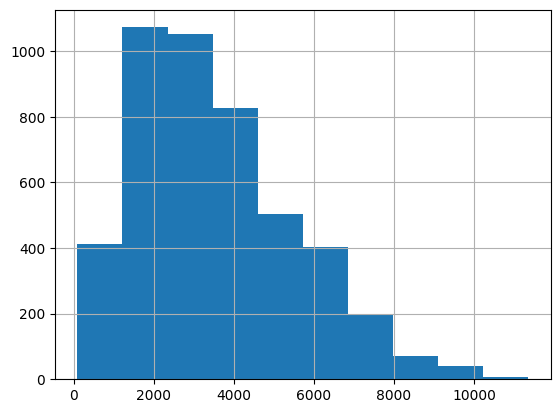

In [7]:
xy_drop_na = xy[xy['Y_rice']>=0]
xy['Y_rice'].hist()

Rows -> train: 116 val: 25 test: 25
Number of features: 293
X_train -> shape: (116, 293), NaN: False, inf: False
y_train -> shape: (116, 1), NaN: False, inf: False
X_val -> shape: (25, 293), NaN: False, inf: False
y_val -> shape: (25, 1), NaN: False, inf: False
X_test -> shape: (25, 293), NaN: False, inf: False
y_test -> shape: (25, 1), NaN: False, inf: False
Using device: cpu
Sequential(
  (0): Linear(in_features=293, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 1/100 Train RMSE: 5192.6357, Val RMSE: 5761.9407
Epoch 2/100 Train RMSE: 5191.8590, Val RMSE: 5759.8481
Epoch 3/100 Train RMSE: 5186.5570, Val RMSE: 5745.0012
Epoch 4/100 Train RMSE: 5151.7362, Val RMSE: 5660.1979
Epoch 5/100 Train RMSE: 4977.9115, Val R

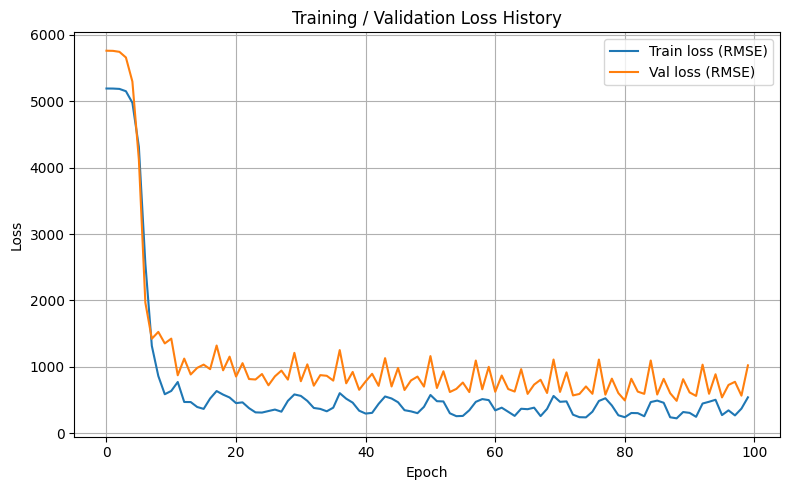

RMSE: 1101.2708740234375
R²: 0.41077595949172974


In [8]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y) + 1e-8)  # small epsilon for stability

# =========================
# 1) Clean data & time splits
# =========================

# Keep only non-negative Y_rice
xy_drop_na = xy[xy["Y_rice"] >= 0].copy()

# Remove inf and NaN in all columns
xy_drop_na = xy_drop_na.replace([np.inf, -np.inf], np.nan).dropna()

# Time-based split
test_xy  = xy_drop_na[xy_drop_na["year"] >= 2019].copy()
train_val_xy = xy_drop_na[xy_drop_na["year"] < 2019].copy()

train_xy = train_val_xy[train_val_xy["year"] < 2014].copy()
val_xy   = train_val_xy[train_val_xy["year"] >= 2014].copy()

print("Rows -> train:", len(train_xy), "val:", len(val_xy), "test:", len(test_xy))

# =========================
# 2) Features / target & scaling
# =========================

target_col = "Y_rice"
# Only drop target; keep 'year' as a feature
non_feature_cols = ["Y_rice"]

feature_cols = [c for c in xy_drop_na.columns if c not in non_feature_cols]
print("Number of features:", len(feature_cols))

X_train_df = train_xy[feature_cols].copy()
y_train_df = train_xy[[target_col]].copy()

X_val_df   = val_xy[feature_cols].copy()
y_val_df   = val_xy[[target_col]].copy()

X_test_df  = test_xy[feature_cols].copy()
y_test_df  = test_xy[[target_col]].copy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df).astype(np.float32)
X_val   = scaler.transform(X_val_df).astype(np.float32)
X_test  = scaler.transform(X_test_df).astype(np.float32)

y_train = y_train_df.to_numpy().astype(np.float32)
y_val   = y_val_df.to_numpy().astype(np.float32)
y_test  = y_test_df.to_numpy().astype(np.float32)

# =========================
# 3) Sanity check for NaN / inf
# =========================

def check_arr(name, arr):
    print(
        f"{name} -> shape: {arr.shape}, "
        f"NaN: {np.isnan(arr).any()}, "
        f"inf: {np.isinf(arr).any()}"
    )

check_arr("X_train", X_train)
check_arr("y_train", y_train)
check_arr("X_val",   X_val)
check_arr("y_val",   y_val)
check_arr("X_test",  X_test)
check_arr("y_test",  y_test)

# If any of those show True for NaN/inf, that's the source of NaN loss.

# =========================
# 4) PyTorch datasets + loaders
# =========================

train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
val_dataset   = TensorDataset(torch.FloatTensor(X_val),  torch.FloatTensor(y_val))

# test has only features (no labels)
test_dataset  = TensorDataset(torch.FloatTensor(X_test))

batch_size = 8

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# =========================
# 5) Define neural network
# =========================

n_neuron   = 64
N_layers   = 4
activation = "ReLU"
learning_rate = 0.001
num_epochs = 100

layers_list = [nn.Linear(X_train.shape[1], n_neuron),
               getattr(nn, activation)()]

for _ in range(N_layers - 1):
    layers_list.append(nn.Linear(n_neuron, n_neuron))
    layers_list.append(getattr(nn, activation)())

layers_list.append(nn.Linear(n_neuron, 1))  # output layer (Y_rice)

model = nn.Sequential(*layers_list).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print(model)

# =========================
# 6) Training loop with early stopping
# =========================

criterion = RMSELoss()     

best_state_dict = model.state_dict()
best_val_loss = float("inf")
patience = 20
patience_counter = 0

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # ---- Train ----
    model.train()
    running_train_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)   # <-- RMSE
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    train_loss = running_train_loss / len(train_loader)

    # ---- Validation ----
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)   # <-- RMSE
            running_val_loss += loss.item()

    val_loss = running_val_loss / len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} "
          f"Train RMSE: {train_loss:.4f}, Val RMSE: {val_loss:.4f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_state_dict = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

model.load_state_dict(best_state_dict)


# =========================
# 7) Plot training history
# =========================

def plot_history(train_losses, val_losses):
    plt.figure(figsize=(8,5))
    plt.plot(train_losses, label="Train loss (RMSE)")
    plt.plot(val_losses, label="Val loss (RMSE)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training / Validation Loss History")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_history(train_losses, val_losses)

# =========================
# 8) Predict on test set
# =========================
model.eval()
y_pred_test = []

with torch.no_grad():
    for (batch_X,) in test_loader:      # unpack single-tensor batch
        batch_X = batch_X.to(device)
        preds = model(batch_X).cpu().numpy().flatten()
        y_pred_test.extend(preds)

y_pred_test = np.array(y_pred_test, dtype=np.float32)

# ---- Compute metrics ----
from sklearn.metrics import root_mean_squared_error, r2_score

from sklearn.metrics import root_mean_squared_error, r2_score

rmse = root_mean_squared_error(y_test, y_pred_test)
r2   = r2_score(y_test, y_pred_test)

print("RMSE:", rmse)
print("R²:", r2)
